<a href="https://colab.research.google.com/github/kodykerbox/COVID_HAWAII/blob/master/Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)Covid-19 Analysis - 4/30/20 by KK

Source: The original code for the national data is from Noah Gift's book on Minimal Python. Github Source - https://github.com/debasisb/minimal-python/blob/master/Chapter7_data_science.ipynb


Import pandas and create a dataframe df for the US Covid-19 data from the NY Times GitHub content

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head(20)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


Display the columns of the data frame df. Shape is the dimensions of the data frame selected or the # rows and # of columns

In [0]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [0]:
df.shape

(3204, 5)

The Seaborn visualization package, is a plotting and graphical package that is used to display data on histograms, scatterplot etc.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


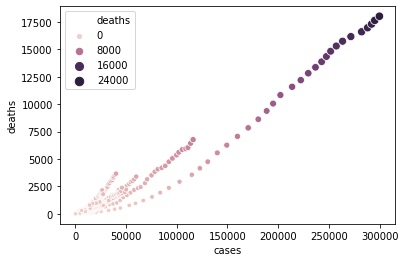

In [0]:
import seaborn as sns
sns.scatterplot (x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

Create an index of Dates from the source of the data till latest date

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-29', '2020-04-29', '2020-04-29', '2020-04-29',
               '2020-04-29', '2020-04-29', '2020-04-29', '2020-04-29',
               '2020-04-29', '2020-04-29'],
              dtype='datetime64[ns]', name='date', length=3204, freq=None)

Create the date for today, and the date two days ago (for the latest data for 2 days)

In [0]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-30
Two days ago 2020-04-28


Display the top 10 rows of data or head(10), bottom rows is tail()

In [0]:
df.loc[daybefore:today].head(10)

,state,fips,cases,deaths
date,,,,
2020-04-28,Alabama,1,6750,242
2020-04-28,Alaska,2,349,7
2020-04-28,Arizona,4,6948,297
2020-04-28,Arkansas,5,3127,57
2020-04-28,California,6,46570,1884
2020-04-28,Colorado,8,14239,734
2020-04-28,Connecticut,9,26312,2089
2020-04-28,Delaware,10,4575,137
2020-04-28,District of Columbia,11,3994,190


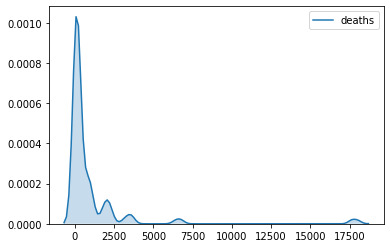

In [0]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

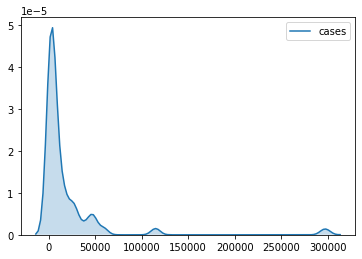

In [0]:
sns.kdeplot(df.loc[daybefore:today]["cases"], shade=True)

Create a data frame the identifies the top 10 states, sort by deaths and cases

In [0]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-29,New York,36,299722,18015
2020-04-28,New York,36,295137,17638
2020-04-29,New Jersey,34,116264,6770
2020-04-28,New Jersey,34,113856,6442
2020-04-29,Michigan,26,40360,3670
2020-04-28,Michigan,26,39234,3566
2020-04-29,Massachusetts,25,60265,3405
2020-04-28,Massachusetts,25,58302,3153
2020-04-29,Pennsylvania,42,46191,2392


In [0]:
current_df.shape

(110, 4)

In [0]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New York',
 'New Jersey',
 'New Jersey',
 'Michigan',
 'Michigan',
 'Massachusetts',
 'Massachusetts',
 'Pennsylvania',
 'Illinois']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [0]:
set(top_states_df.state.values)

{'Illinois',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Pennsylvania'}

Use Seaborn to create a basic line plot for the top 10 states

<Figure size 1080x360 with 0 Axes>

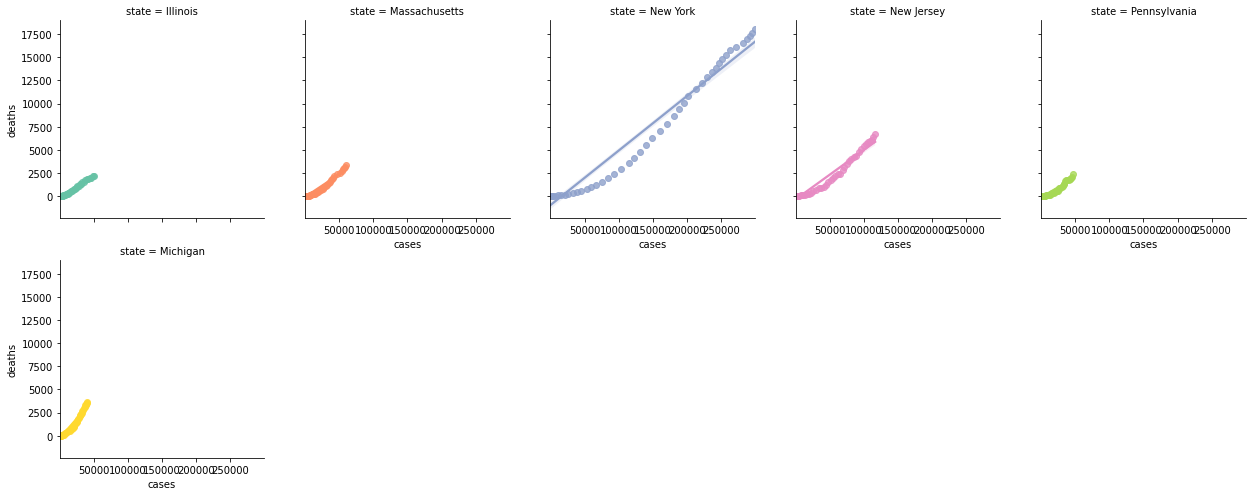

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [0]:
top_states_april_current_df = top_states_df.loc["2020-04-12":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(10)

,state,cases,deaths
date,,,
2020-04-29,New York,299722,18015
2020-04-28,New York,295137,17638
2020-04-27,New York,292027,17303
2020-04-26,New York,288076,16966
2020-04-25,New York,282174,16599
2020-04-24,New York,271621,16162
2020-04-23,New York,263460,15740
2020-04-22,New York,257246,15302
2020-04-21,New York,251720,14828


Use another popular graphical tool called Plotly. This shows a scatter plot for the month of April for the top 10 states

In [0]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Import State Level Data for Hawaii from national dataset

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Hawaii_df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
Hawaii_df.tail(15)

,date,cases,deaths
2391,2020-04-15,524,9
2446,2020-04-16,535,9
2501,2020-04-17,547,9
2556,2020-04-18,568,9
2611,2020-04-19,574,10
2666,2020-04-20,578,10
2721,2020-04-21,580,12
2776,2020-04-22,586,12
2831,2020-04-23,590,12
2886,2020-04-24,595,13


Import County Level Data for Hawaii from county dataset

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
df.tail(15)

,date,county,cases,deaths
90290,2020-04-26,Honolulu,396,9
90291,2020-04-26,Kauai,21,0
90292,2020-04-26,Maui,112,5
93109,2020-04-27,Hawaii,70,0
93110,2020-04-27,Honolulu,396,11
93111,2020-04-27,Kauai,21,0
93112,2020-04-27,Maui,113,5
95940,2020-04-28,Hawaii,70,0
95941,2020-04-28,Honolulu,396,11
95942,2020-04-28,Kauai,21,0


Create a data frame for Maui County and display data for past 15 days

In [0]:
Maui_County_df = df[df["county"]== "Maui"]
Maui_County_df.tail(15)

,date,county,cases,deaths
59764,2020-04-15,Maui,92,3
62488,2020-04-16,Maui,95,3
65223,2020-04-17,Maui,102,3
67973,2020-04-18,Maui,104,3
70735,2020-04-19,Maui,106,4
73505,2020-04-20,Maui,108,4
76282,2020-04-21,Maui,110,5
79065,2020-04-22,Maui,110,5
81861,2020-04-23,Maui,112,5
84662,2020-04-24,Maui,113,5


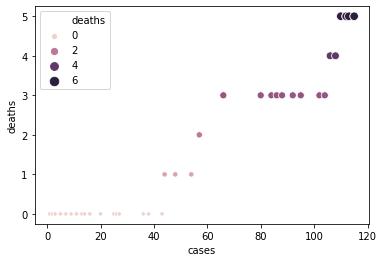

In [0]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

<Figure size 1080x360 with 0 Axes>

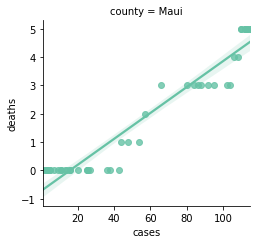

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

Create a data frame for Honolulu County and display data for past 15 days

In [0]:
Honolulu_County_df = df[df["county"]== "Honolulu"]
Honolulu_County_df.tail(15)

,date,county,cases,deaths
59762,2020-04-15,Honolulu,369,6
62486,2020-04-16,Honolulu,373,6
65221,2020-04-17,Honolulu,380,6
67971,2020-04-18,Honolulu,382,6
70733,2020-04-19,Honolulu,385,6
73503,2020-04-20,Honolulu,385,6
76280,2020-04-21,Honolulu,385,7
79063,2020-04-22,Honolulu,388,7
81859,2020-04-23,Honolulu,389,7
84660,2020-04-24,Honolulu,392,8


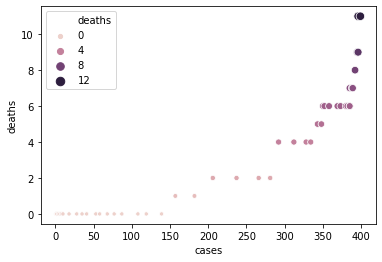

In [0]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

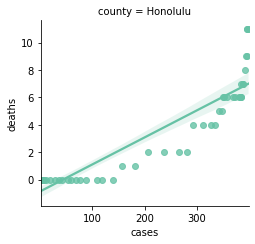

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)

In [0]:
Kauai_County_df = df[df["county"]== "Kauai"]
Kauai_County_df.tail()

,date,county,cases,deaths
87472,2020-04-25,Kauai,21,0
90291,2020-04-26,Kauai,21,0
93111,2020-04-27,Kauai,21,0
95942,2020-04-28,Kauai,21,0
98783,2020-04-29,Kauai,21,0


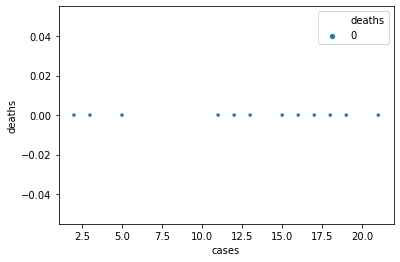

In [0]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Kauai_County_df)